In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

from mcopt.pipeline import Pipeline
from mcopt import ot, MorseGraph

# Load Morse Complexes

In [3]:
pipeline = Pipeline('../pipeline.config.json')

In [4]:
mc = pipeline.complex('sinusoidal').frames[0]

mc_noisy = pipeline.complex('sinusoidal_noisy').frames[0]

> Loading sinusoidal complex
  config unchanged, reading complex


> Loading sinusoidal_noisy complex
  config unchanged, reading complex


# Construct Morse Graphs

In [5]:
mg = mc.to_graph().sample(5)
mg_noisy = mc_noisy.to_graph().sample(5)

Text(0.5, 1.0, 'Sinusoidal noisy')

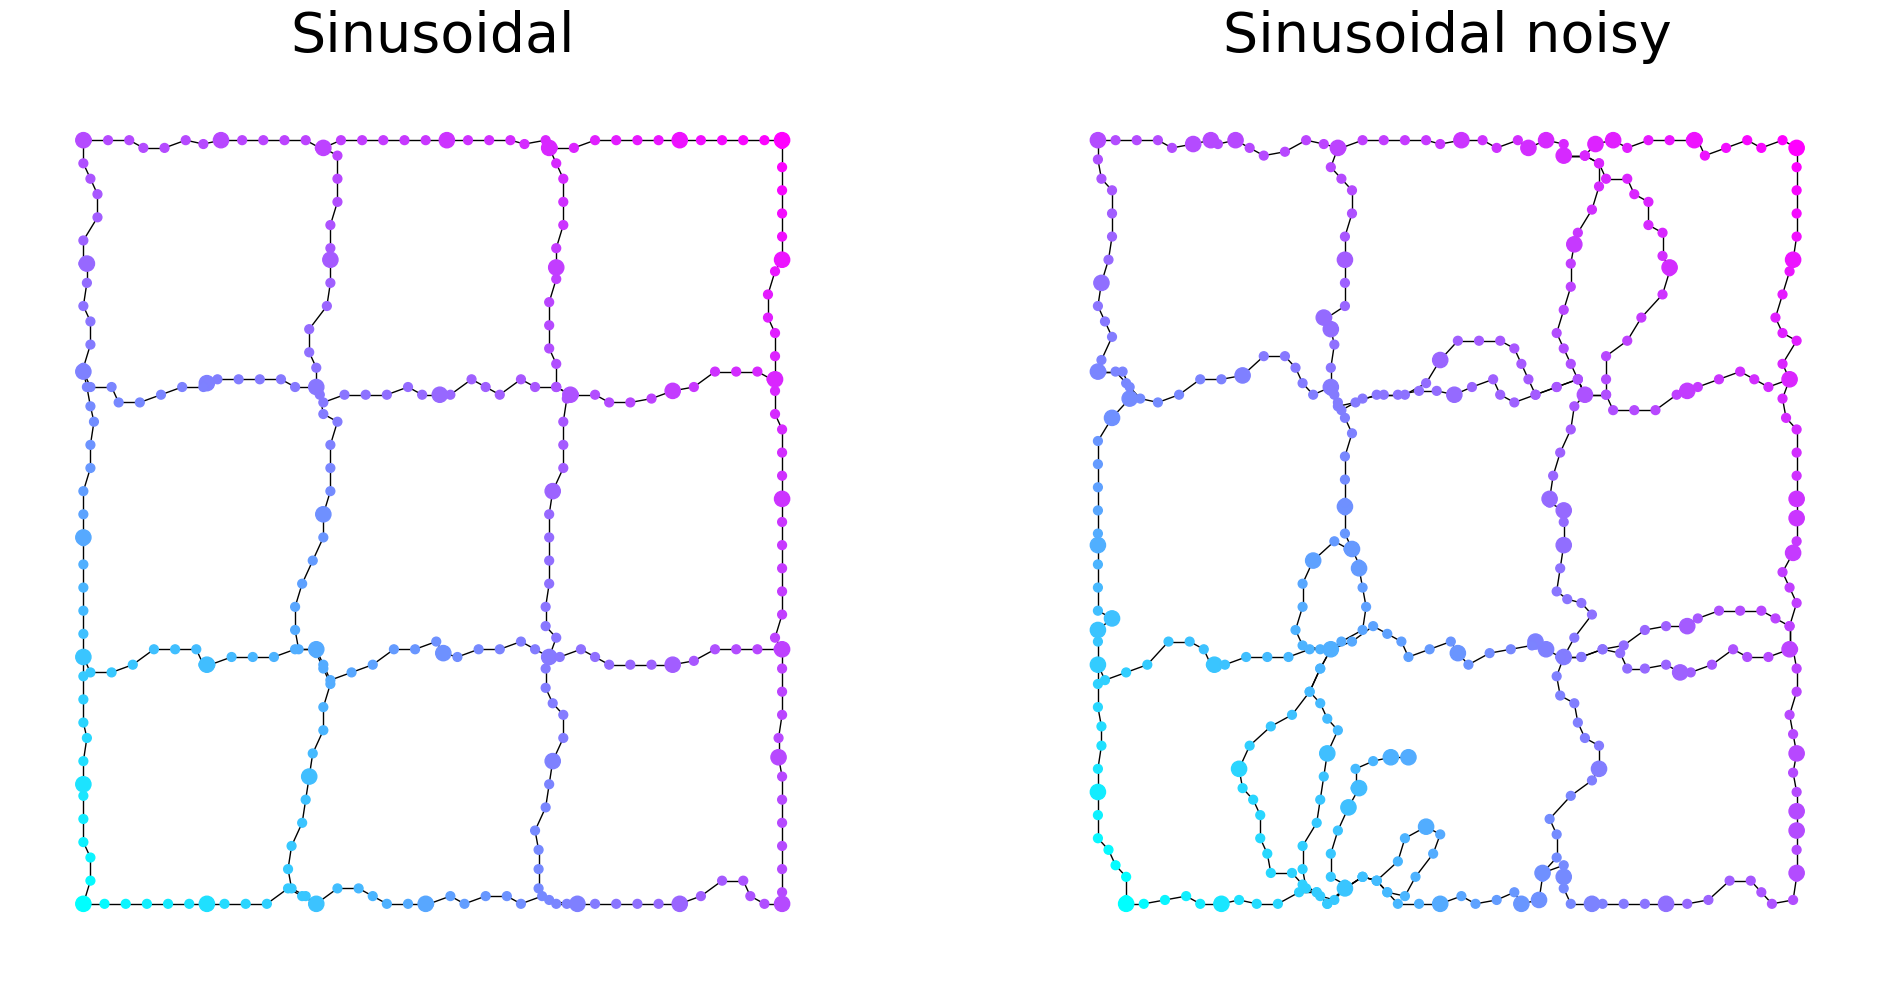

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axes[0], cmap=cmap)
axes[0].set_title('Sinusoidal', fontsize=40)

mg_noisy.draw(ax=axes[1], cmap=cmap)
axes[1].set_title('Sinusoidal noisy', fontsize=40)

# Perform Optional Transport

## Construct Metric Measure Networks

In [7]:
mg_net = mg.to_mpn()
mg_noisy_net = mg_noisy.to_mpn()

## GW Optimal Transport

In [8]:
coupling, _ = ot.GW(mg_net, mg_noisy_net, random_G0=True, random_state=42)

In [9]:
M = MorseGraph.attribute_cost_matrix(mg, mg_noisy)

fused_coupling, _ = ot.fGW(mg_net, mg_noisy_net, M, random_G0=True, random_state=42)

In [10]:
m = 0.95

partial_coupling, _ = ot.pGW(mg_net, mg_noisy_net, m, random_G0=True, random_state=42)

In [11]:
fused_partial_coupling, _ = ot.fpGW(mg_net, mg_noisy_net, m, M, random_G0=True, random_state=42)

In [15]:
unbalanced_coupling, _ = ot.uGW(mg_net, mg_noisy_net, random_G0=True, random_state=42)

Text(0.5, 1.0, 'Destination Graph (uGW)')

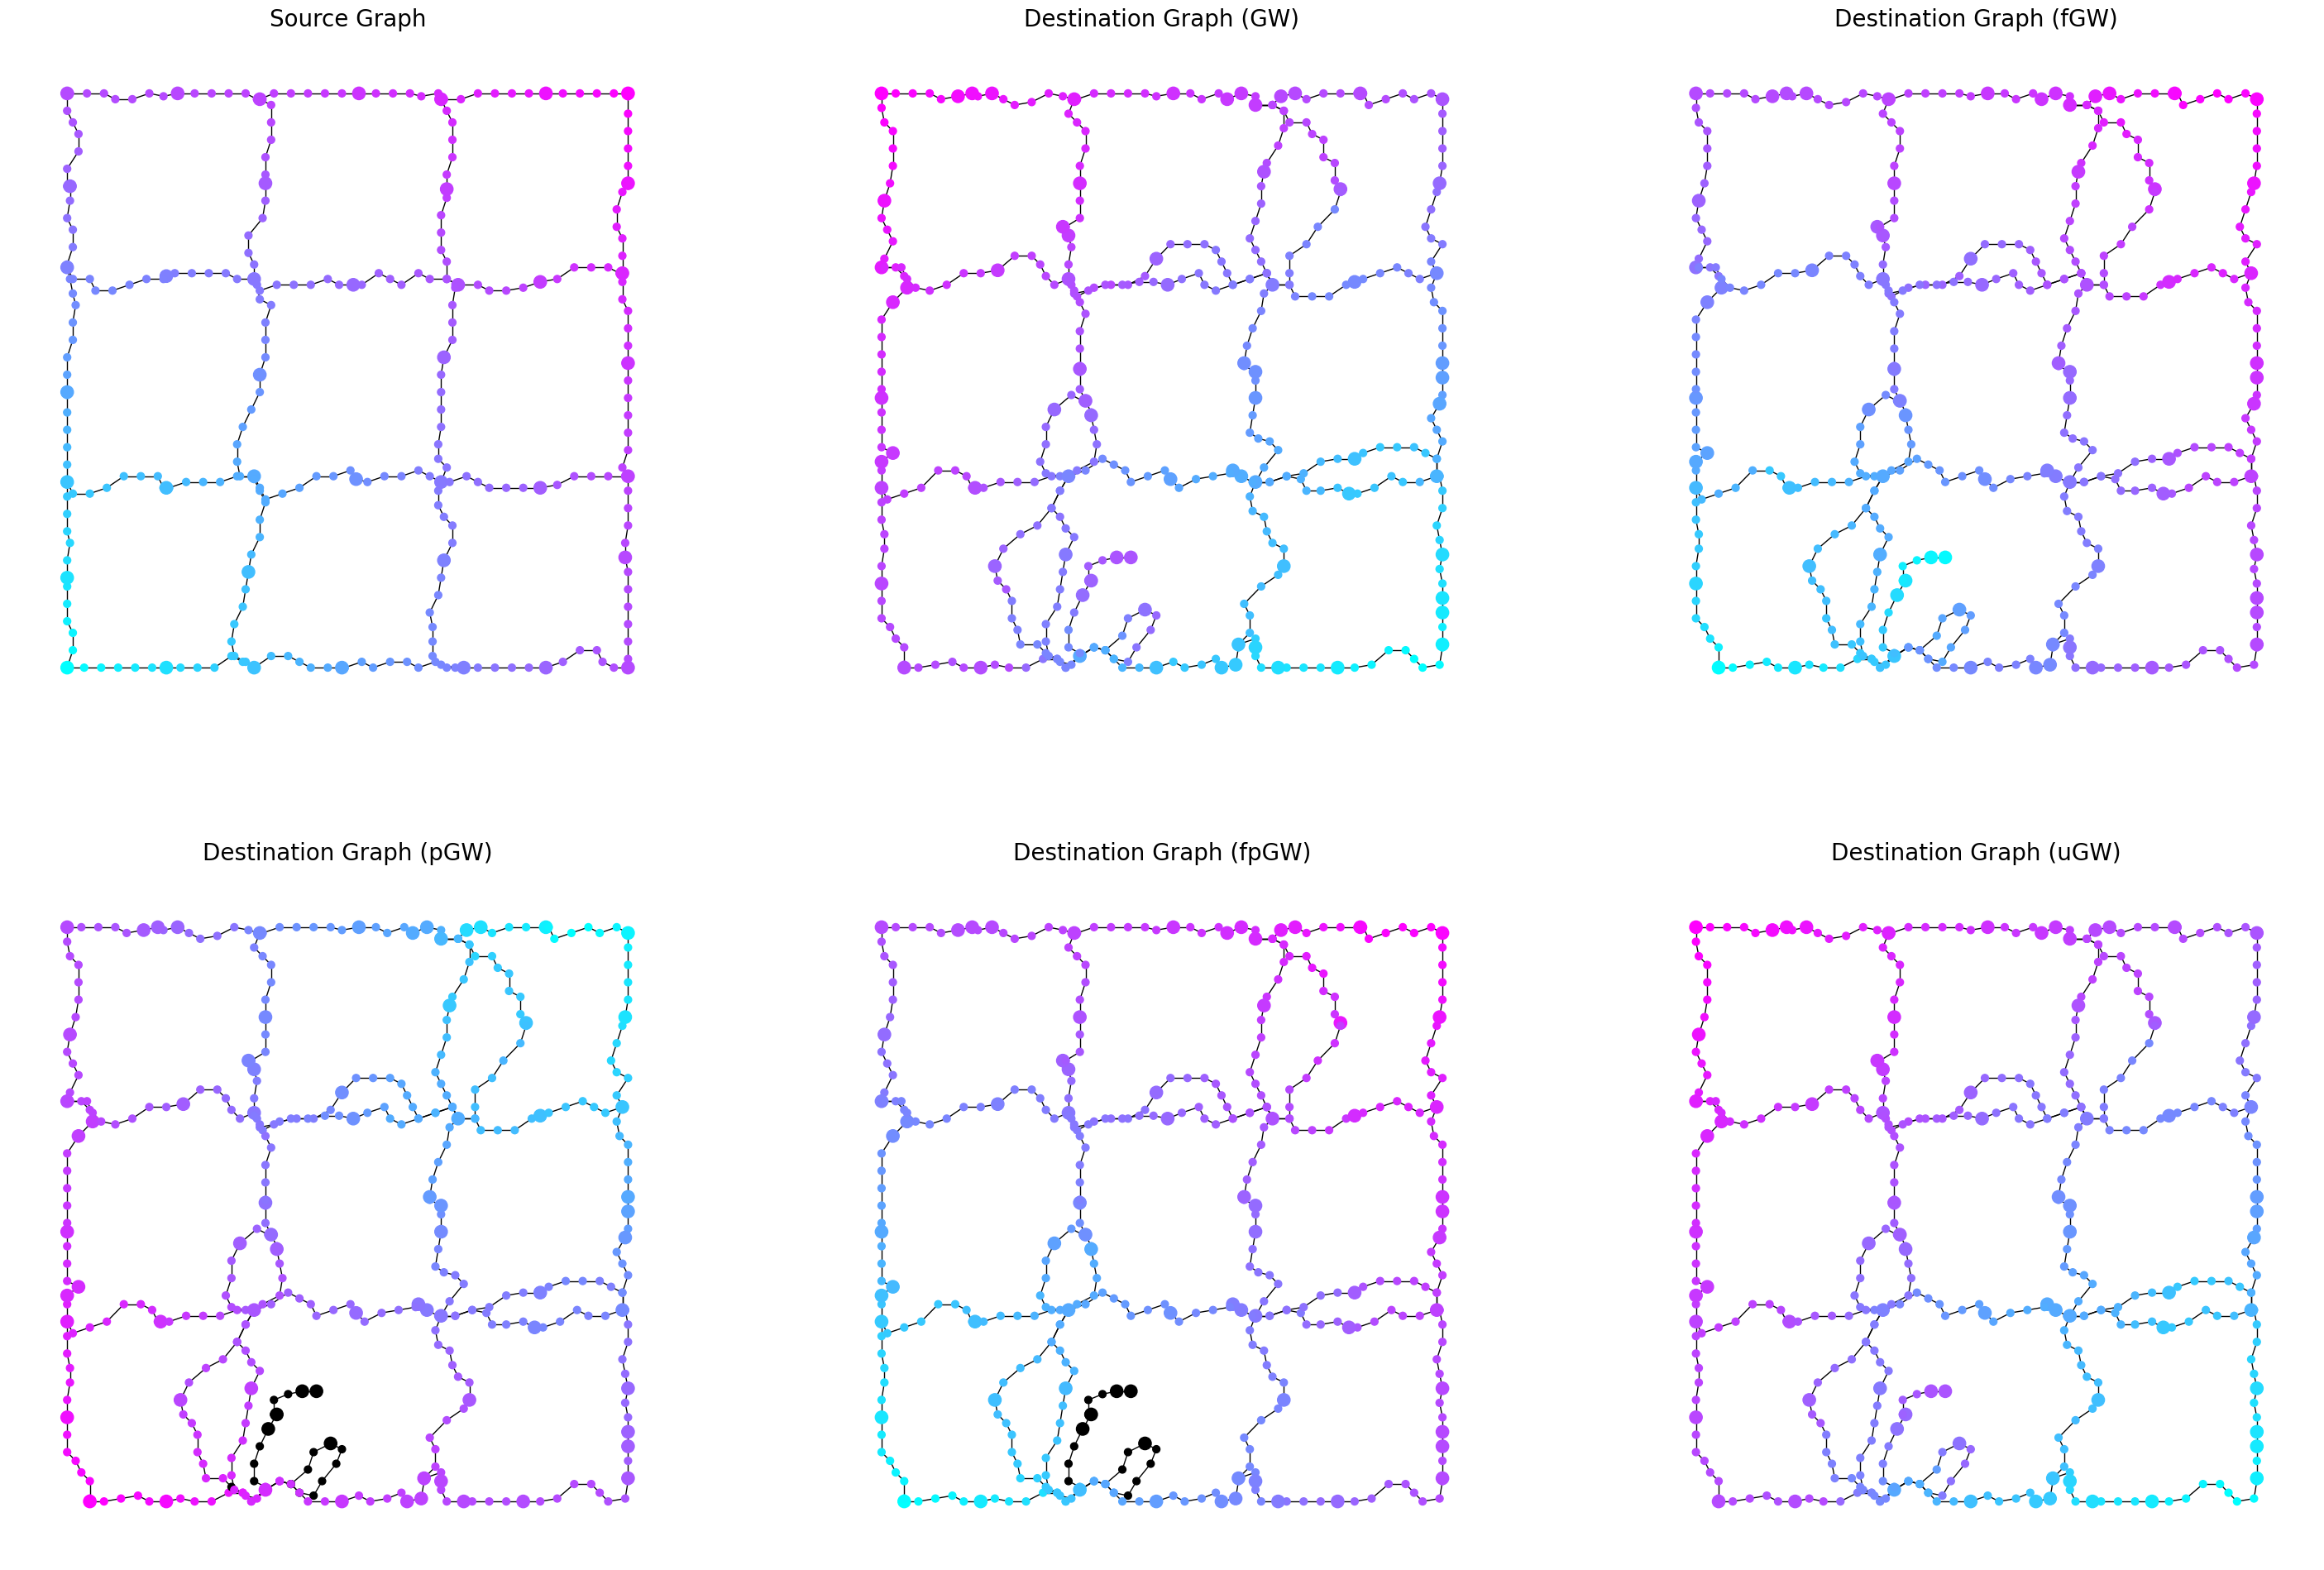

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(36, 24))
cmap = 'cool'

mg_node_color = mg.node_color_by_position()
mg.draw(
  ax=axes[0, 0],
  cmap=cmap,
  node_color=mg_node_color,
)
axes[0, 0].set_title('Source Graph', fontsize=20)

mg_noisy.draw(
  ax=axes[0, 1],
  cmap=cmap,
  node_color=mg_noisy.node_color_by_coupling(mg_node_color, coupling),
)
axes[0, 1].set_title('Destination Graph (GW)', fontsize=20)

mg_noisy.draw(
  ax=axes[0, 2],
  cmap=cmap,
  node_color=mg_noisy.node_color_by_coupling(mg_node_color, fused_coupling),
)
axes[0, 2].set_title('Destination Graph (fGW)', fontsize=20)

mg_noisy.draw(
  ax=axes[1, 0],
  cmap=cmap,
  node_color=mg_noisy.node_color_by_coupling(mg_node_color, partial_coupling),
)
axes[1, 0].set_title('Destination Graph (pGW)', fontsize=20)

mg_noisy.draw(
  ax=axes[1, 1],
  cmap=cmap,
  node_color=mg_noisy.node_color_by_coupling(mg_node_color, fused_partial_coupling),
)
axes[1, 1].set_title('Destination Graph (fpGW)', fontsize=20)

mg_noisy.draw(
  ax=axes[1, 2],
  cmap=cmap,
  node_color=mg_noisy.node_color_by_coupling(mg_node_color, unbalanced_coupling),
)
axes[1, 2].set_title('Destination Graph (uGW)', fontsize=20)